In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("../Life_Expectancy_preprocessed.csv")
data = data.iloc[:, 1:]

data.head()

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing,Life expectancy
0,Afghanistan,2015,263,62,0.01,71.279624,65,1154,19.1,83,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,False,True,65.0
1,Afghanistan,2014,271,64,0.01,73.523582,62,492,18.6,86,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,False,True,59.9
2,Afghanistan,2013,268,66,0.01,73.219243,64,430,18.1,89,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,False,True,59.9
3,Afghanistan,2012,272,69,0.01,78.184215,67,2787,17.6,93,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,False,True,59.5
4,Afghanistan,2011,275,71,0.01,7.097109,68,3013,17.2,97,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,False,True,59.2


From the decision tree, we found that the important variables are 'Income composition of resources', 'Adult Mortality', 'Schooling', 'Alcohol', 'Total expenditure', 'Measles', ' HIV/AIDS', ' thinness  1-19 years', ' BMI', 'Population'.

From the heatmap, we found that the important variables are 'Adult Mortality', 'Alcohol', 'percentage expenditure', ' BMI ',' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years','Income composition of resources', 'Schooling', 'Status_Developed', 'Status_Developing'.

Let's find duplicates and put them into a regression model.

In [5]:
# features_tree = set(['Income composition of resources', 'Adult Mortality', 'Schooling', 'Alcohol', 'Total expenditure', 'Measles', 
#                  ' HIV/AIDS', ' thinness  1-19 years', ' BMI', 'Population'])


features_tree = set(['Income composition of resources', 'Adult Mortality','HIV/AIDS', 'thinness  1-19 years', 'Schooling', 'Total expenditure',
'thinness 5-9 years','BMI' , 'Measles' ,'under-five deaths' ,'Alcohol' ,'Population' ])
features_heatmap = set(['Adult Mortality', 'Alcohol', 'percentage expenditure', 'BMI','HIV/AIDS', 'GDP', 'thinness  1-19 years', 
                    'thinness 5-9 years','Income composition of resources', 'Schooling', 'Status_Developed', 'Status_Developing'])

In [6]:
features_ = list(features_tree & features_heatmap)
print(features_)

['thinness  1-19 years', 'Schooling', 'BMI', 'thinness 5-9 years', 'Income composition of resources', 'Alcohol', 'Adult Mortality', 'HIV/AIDS']


In [7]:
data.columns

Index(['Country', 'Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status_Developed', 'Status_Developing', 'Life expectancy'],
      dtype='object')

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [9]:
X = data[features_]
y = data[['Life expectancy']]

# train_test_split method for training and testing
# Based on the graph drawn previously, the ratio is set to 0.5.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=42)

In [10]:
X

,thinness 1-19 years,Schooling,BMI,thinness 5-9 years,Income composition of resources,Alcohol,Adult Mortality,HIV/AIDS
0,17.2,10.1,19.1,17.3,0.479,0.01,263,0.1
1,17.5,10.0,18.6,17.5,0.476,0.01,271,0.1
2,17.7,9.9,18.1,17.7,0.470,0.01,268,0.1
3,17.9,9.8,17.6,18.0,0.463,0.01,272,0.1
4,18.2,9.5,17.2,18.2,0.454,0.01,275,0.1
...,...,...,...,...,...,...,...,...
1644,9.4,9.2,27.1,9.4,0.407,4.36,723,33.6
1645,9.8,9.5,26.7,9.9,0.418,4.06,715,36.7
1646,1.2,10.0,26.3,1.3,0.427,4.43,73,39.8
1647,1.6,9.8,25.9,1.7,0.427,1.72,686,42.1


In [11]:
y

,Life expectancy
0,65.0
1,59.9
2,59.9
3,59.5
4,59.2
...,...
1644,44.3
1645,44.5
1646,44.8
1647,45.3


In [12]:
from sklearn.linear_model import LinearRegression

#creating Linear Regression Model and fitting our Training Data
model = LinearRegression()
model.fit(X_train,y_train)

# Exporting the model
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


coef = model.coef_
intercept = model.intercept_

#Predict method to predict life expectancy age
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"The Coefficient for the X values are: {coef}")
print(f"The Intercept is: {intercept}")

The Coefficient for the X values are: [[-0.09029176  1.17600529  0.02636543  0.01258781  8.87748797 -0.07642281
  -0.0182296  -0.41343423]]
The Intercept is: [53.05054498]


In [13]:
from sklearn.metrics import mean_squared_error, r2_score

#Finding MSE and R^2 on Training Data and Testing Data
mse_train = mean_squared_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error for train: {mse_train}")
print(f"R Squared for train: {r2_train}")

print(f"\nMean Squared Error for test: {mse_test}")
print(f"R Squared for test: {r2_test}")

Mean Squared Error for train: 13.731053912060114
R Squared for train: 0.8180492667156523

Mean Squared Error for test: 15.10015097046967
R Squared for test: 0.8090166506480021


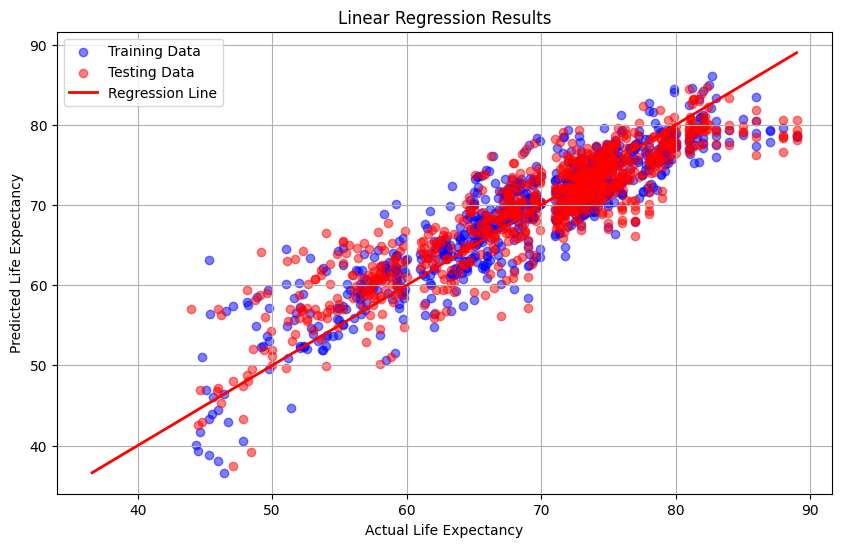

In [14]:
plt.figure(figsize=(10,6))

#Convert to Array so Matplotlib can be compatible with the Data
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train_pred = np.array(y_train_pred)
y_test_pred = np.array(y_test_pred)

#Scatter plot for both training data and testing data
plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.5)
plt.scatter(y_test, y_test_pred, label='Testing Data', color='red', alpha=0.5)

#Min and Max value for training and testing data
min_val = min(y_train.min(), y_test.min(), y_train_pred.min(), y_test_pred.min())
max_val = max(y_train.max(), y_test.max(), y_train_pred.max(), y_test_pred.max())

#Plotting the regression line
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='Regression Line')

plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.legend()
plt.title('Linear Regression Results')
plt.grid(True)
plt.show()

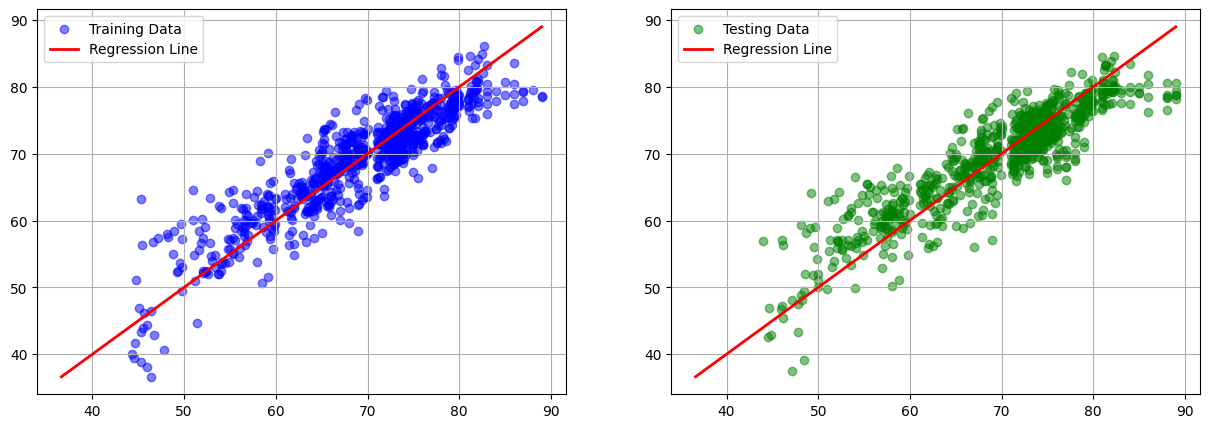

In [15]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.5)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='Regression Line')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.scatter(y_test, y_test_pred, label='Testing Data', color='green', alpha=0.5)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='Regression Line')
plt.grid(True)
plt.legend()

plt.show()

mprof: Sampling memory every 0.1s
running new process
running as a Python program...


/Users/jules/github/DataScience-Paper/.conda/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/jules/github/DataScience-Paper/.conda/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/jules/github/DataScience-Paper/.conda/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/jules/github/DataScience-Paper/.conda/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/jules/github/DataScience-Paper/.conda/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but

Filename: statistics/memoryAndCpu.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    18    131.5 MiB    131.5 MiB           1   @profile()
    19                                         def predict():
    20                                             # Set the current time
    21    131.5 MiB      0.0 MiB           1       current_time = time.time()
    22                                             # Loop the specified number of times
    23    131.7 MiB      0.0 MiB          11       for i in range(10):
    24                                                 # ['Schooling', 'BMI', 'Alcohol', 'thinness 5-9 years', 'HIV/AIDS', 'Adult Mortality', 'Income composition of resources', 'thinness  1-19 years']
    25                                                 # Make a prediction for the specified features.
    26    131.7 MiB      0.1 MiB          10           model.predict([[14.2, 18.1, 4.61, 4.6, 0.1, 263, 0.434, 4.7]])
    27                                         

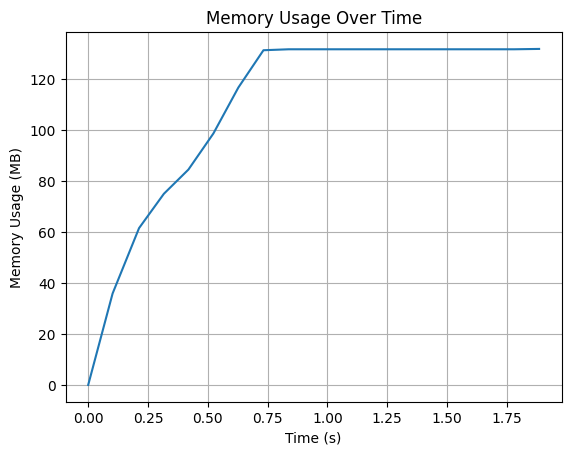

In [16]:
import os
import subprocess

# Run the script with memory profiling using subprocess
subprocess.run(['mprof', 'run', 'statistics/memoryAndCpu.py'])

# List all memory usage data files the output is structured like this: id filename time date
files = subprocess.check_output(['mprof', 'list']).decode('utf-8').strip().split('\n')

# Get the most recent memory usage data file (sorted by id)
filename = files[-1].split()[1]

# Read the memory usage data file
output = open(filename, 'rb').read()

# Clean up the memory usage data file by running it through mprof clean
os.system(f'mprof clean')

# Parse the memory data and extract memory usage values and timestamps
timestamps = []
memory_usages = []
first_timestamp = None

# Iterate through each line in the memory data
for line in output.decode('utf-8').strip().split('\n'):
    # Skip the first line
    if line.startswith('CMDLINE'):
        continue
    parts = line.strip().split()
    if len(parts) == 3:
        try:
            # Make the first timestamp 0
            if first_timestamp is None:
                first_timestamp = float(parts[2])
                
            # Calculate the timestamp and memory usage
            timestamp = float(parts[2]) - first_timestamp
            memory_usage = float(parts[1])
            timestamps.append(timestamp)
            memory_usages.append(memory_usage)
        except ValueError:
            pass  # Skip lines that don't have valid data

# Create a memory usage plot
plt.plot(timestamps, memory_usages)
plt.xlabel('Time (s)')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Over Time')
plt.grid(True)

# Show the memory usage plot
plt.show()


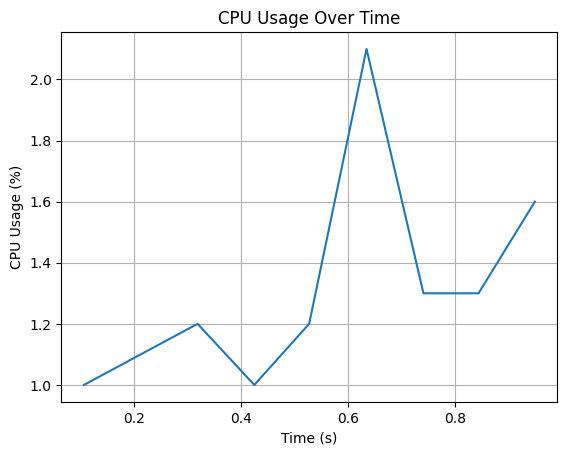

In [17]:
# Open the file cpu_usage_measurements.csv for reading
with open('cpu_usage_measurements.csv', 'r') as f:
    # Skip the first line
    f.readline()
    # Read all lines from the file into a list
    cpuLines = f.readlines()

# Open the file time_measurements.csv for reading
with open('time_measurements.csv', 'r') as f:
    # Skip the first line
    f.readline()
    # Read all lines from the file into a list
    timeLines = f.readlines()

# Delete the file time_measurements.csv
os.remove('time_measurements.csv')
# Delete the file cpu_usage_measurements.csv
os.remove('cpu_usage_measurements.csv')

# Make it a float
cpuLines = [float(line.strip()) for line in cpuLines]

timeLines = [float(line.strip()) for line in timeLines]



# Show the data on a plot
plt.plot(timeLines, cpuLines)
plt.xlabel('Time (s)')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage Over Time')
plt.grid(True)